In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#importing of drug test data
drug_data=pd.read_csv('drug200.csv')
drug_data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [4]:
drug_data.tail(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
190,58,M,HIGH,HIGH,18.991,drugY
191,23,M,HIGH,HIGH,8.011,drugA
192,72,M,LOW,HIGH,16.310,drugY
193,72,M,LOW,HIGH,6.769,drugC
194,46,F,HIGH,HIGH,34.686,drugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
#Data processing and Data Analysis
drug_data.info()
drug_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: xlabel='Cholesterol', ylabel='Count'>

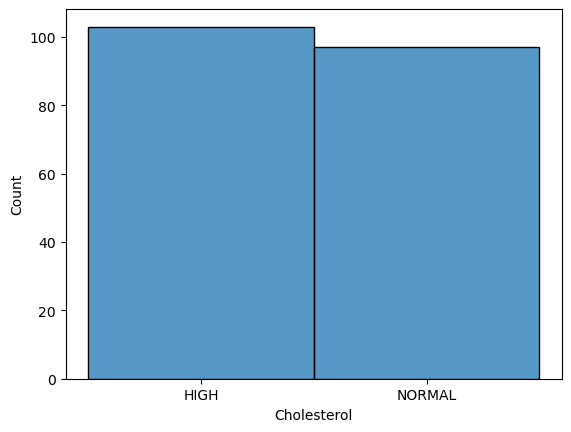

In [6]:
drug_data['Drug'].count()
sns.histplot(drug_data['Cholesterol'])

In [26]:
drug_data['Cholesterol'].value_counts().to_frame()

,Cholesterol
HIGH,103
NORMAL,97


<Axes: xlabel='BP', ylabel='Count'>

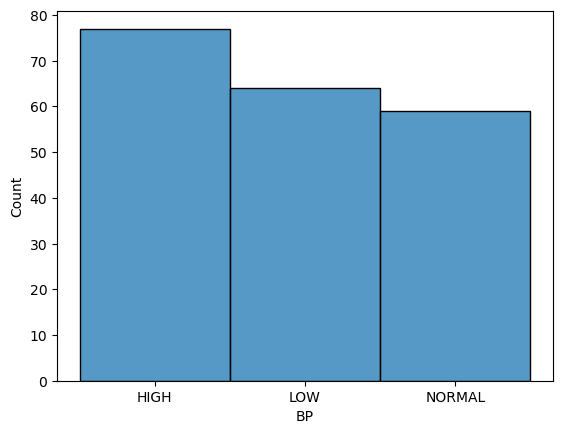

In [8]:
sns.histplot(drug_data['BP'])

In [27]:
drug_data['BP'].value_counts().to_frame()

,BP
HIGH,77
LOW,64
NORMAL,59


In [9]:
#List of drug being tested
drug_data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

Text(0.5, 1.0, 'Age distribution of patience')

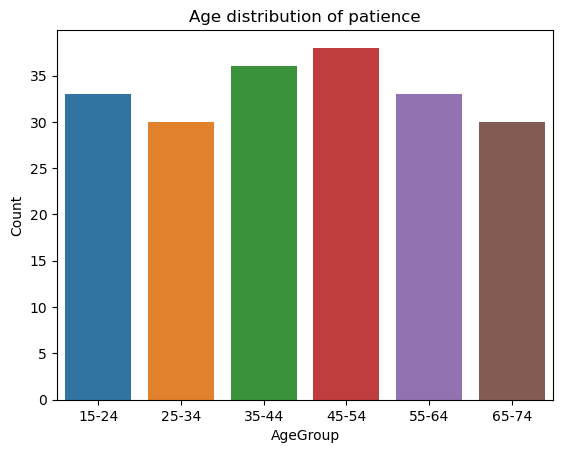

In [10]:
age_bins = [15, 25, 35, 45, 55, 65, 75]
age_labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74']
drug_data['AgeGroup'] = pd.cut(drug_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group data by age groups
grouped_data = drug_data.groupby('AgeGroup').size().reset_index(name='Count')


#########
sns.barplot(x='AgeGroup', y='Count', data=grouped_data )
plt.title('Age distribution of patience')





In [11]:
# Intractive visualization
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

c:\Users\iyand\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [25]:
grouped_data.iplot(kind='bar', x='AgeGroup', y='Count', colors= 'GREEN' )

In [30]:
drug_data['AgeGroup'].value_counts().to_frame()

,AgeGroup
45-54,38
35-44,36
15-24,33
55-64,33
25-34,30
65-74,30


In [22]:
drug_data['Drug'].iplot(kind= 'hist', x=drug_data['Drug'])

In [31]:
drug_data['Drug'].value_counts().to_frame()

,Drug
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


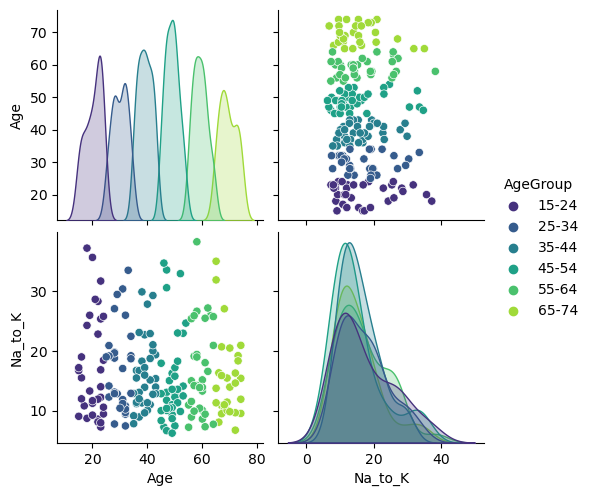

In [17]:
sns.pairplot(drug_data, hue='AgeGroup', palette='viridis')

,Sex
M,104
F,96


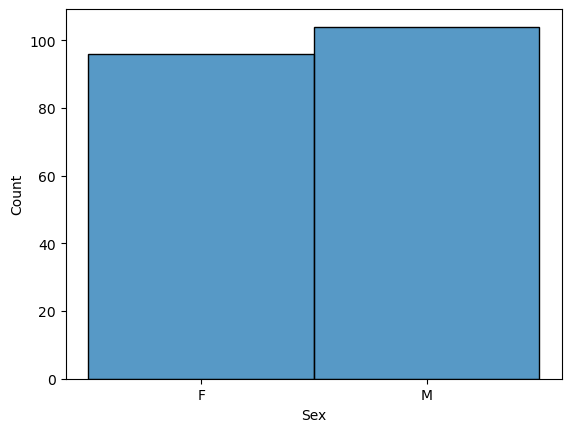

In [32]:
sns.histplot(drug_data['Sex'])
drug_data['Sex'].value_counts().to_frame()

In [74]:
#Age distribution by drug

D_dist= drug_data[drug_data['AgeGroup']== '15-24']
D_dist.count().to_frame()


,0
Age,33
Sex,33
BP,33
Cholesterol,33
Na_to_K,33
Drug,33
AgeGroup,33


Text(0.5, 1.0, 'Drug use distribution among Age 15-24')

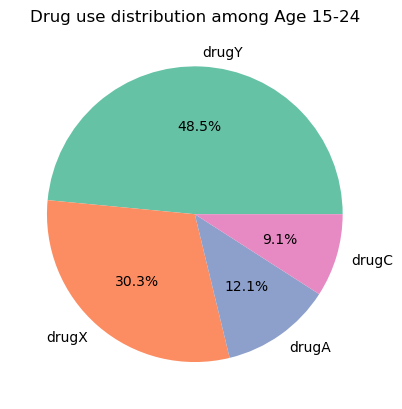

In [68]:
d_count= D_dist['Drug'].value_counts()
plt.pie(d_count, labels=d_count.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Drug use distribution among Age 15-24')

In [73]:
#Sex dribution base on drug
F_dist= drug_data[drug_data['Sex']== 'F']
F_dist.count()
F_dist['Drug'].value_counts().to_frame()


,Drug
drugY,47
drugX,27
drugA,9
drugC,7
drugB,6


In [72]:
D2_dist= drug_data[drug_data['AgeGroup']== '25-34']
D2_dist.count().to_frame()

,0
Age,30
Sex,30
BP,30
Cholesterol,30
Na_to_K,30
Drug,30
AgeGroup,30


Text(0.5, 1.0, 'Drug use distribution among Age 25-34')

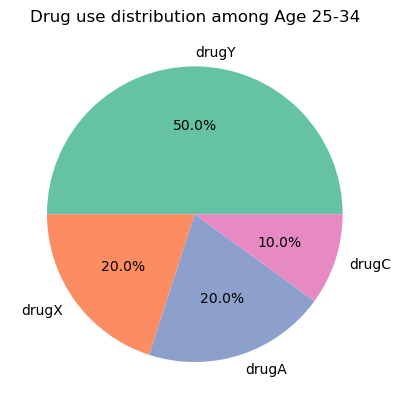

In [75]:
d2_count= D2_dist['Drug'].value_counts()
plt.pie(d2_count, labels=d2_count.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Drug use distribution among Age 25-34')

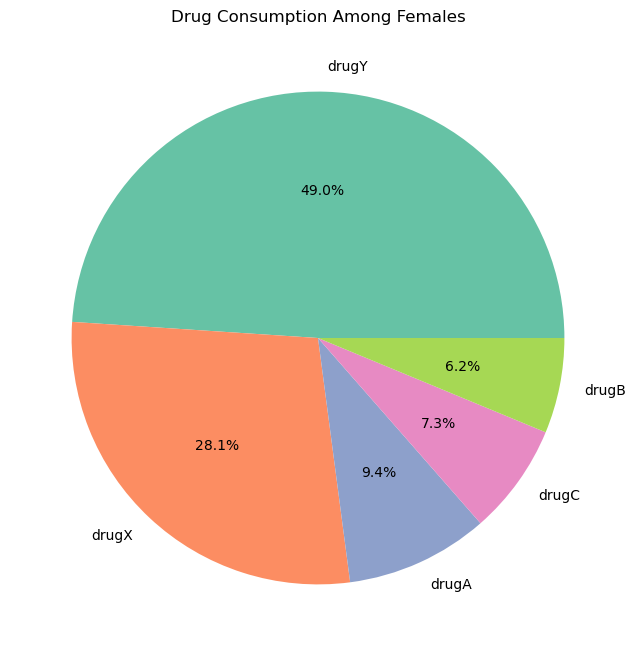

In [43]:
F_dist = drug_data[drug_data['Sex'] == 'F']

# Count the occurrences of each drug
drug_counts = F_dist['Drug'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(drug_counts, labels=drug_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))

# Add title
plt.title('Drug Consumption Among Females')

# Show the plot
plt.show()

In [60]:
F_dist1= drug_data[drug_data['Sex']== 'M']
F_dist1.count()
F_dist1['Drug'].value_counts()

drugY    44
drugX    27
drugA    14
drugB    10
drugC     9
Name: Drug, dtype: int64

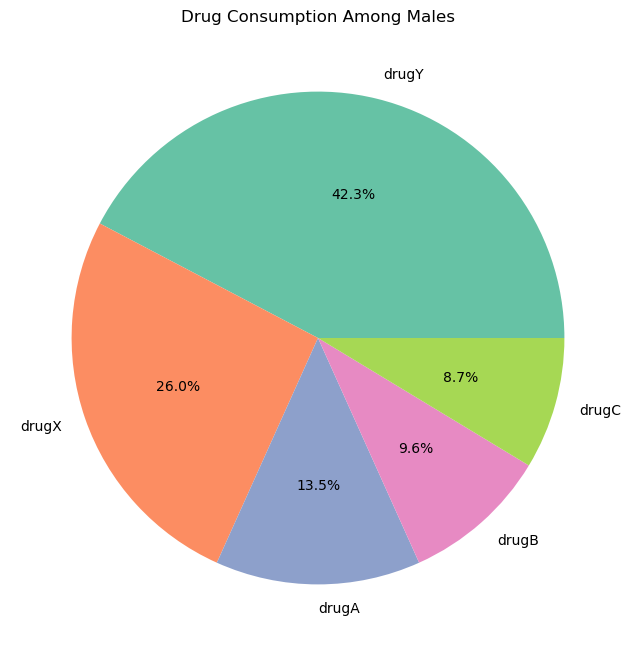

In [58]:
F_dist1 = drug_data[drug_data['Sex'] == 'M']

# Count the occurrences of each drug
drug_counts1 = F_dist1['Drug'].value_counts()

# Create a pie chart with a donut design
plt.figure(figsize=(8, 8))
plt.pie(drug_counts, labels=drug_counts1.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))

# Add title
plt.title('Drug Consumption Among Males')

# Show the plot
plt.show()

In [77]:
drug_data['Na_to_K'].iplot(kind='scatter')

Machine Learning

In [78]:
drug_data.notnull()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,AgeGroup
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
195,True,True,True,True,True,True,True
196,True,True,True,True,True,True,True
197,True,True,True,True,True,True,True
198,True,True,True,True,True,True,True


In [79]:
drug_data.dropna

<bound method DataFrame.dropna of      Age Sex      BP Cholesterol  Na_to_K   Drug AgeGroup
0     23   F    HIGH        HIGH   25.355  drugY    15-24
1     47   M     LOW        HIGH   13.093  drugC    45-54
2     47   M     LOW        HIGH   10.114  drugC    45-54
3     28   F  NORMAL        HIGH    7.798  drugX    25-34
4     61   F     LOW        HIGH   18.043  drugY    55-64
..   ...  ..     ...         ...      ...    ...      ...
195   56   F     LOW        HIGH   11.567  drugC    55-64
196   16   M     LOW        HIGH   12.006  drugC    15-24
197   52   M  NORMAL        HIGH    9.894  drugX    45-54
198   23   M  NORMAL      NORMAL   14.020  drugX    15-24
199   40   F     LOW      NORMAL   11.349  drugX    35-44

[200 rows x 7 columns]>

In [81]:
drug_data.shape

(200, 7)

In [114]:
drug_data.head(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,AgeGroup
0,23,F,HIGH,HIGH,25.355,drugY,15-24
1,47,M,LOW,HIGH,13.093,drugC,45-54
2,47,M,LOW,HIGH,10.114,drugC,45-54
3,28,F,NORMAL,HIGH,7.798,drugX,25-34
4,61,F,LOW,HIGH,18.043,drugY,55-64
5,22,F,NORMAL,HIGH,8.607,drugX,15-24
6,49,F,NORMAL,HIGH,16.275,drugY,45-54
7,41,M,LOW,HIGH,11.037,drugC,35-44
8,60,M,NORMAL,HIGH,15.171,drugY,55-64
9,43,M,LOW,NORMAL,19.368,drugY,35-44


In [83]:
#Import scikit learn

In [102]:
from sklearn.model_selection import train_test_split

In [113]:
data_encoded = pd.get_dummies(drug_data, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)
data_encoded.head(20)

,Age,Na_to_K,Drug,AgeGroup,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,drugY,15-24,0,0,0,0
1,47,13.093,drugC,45-54,1,1,0,0
2,47,10.114,drugC,45-54,1,1,0,0
3,28,7.798,drugX,25-34,0,0,1,0
4,61,18.043,drugY,55-64,0,1,0,0
5,22,8.607,drugX,15-24,0,0,1,0
6,49,16.275,drugY,45-54,0,0,1,0
7,41,11.037,drugC,35-44,1,1,0,0
8,60,15.171,drugY,55-64,1,0,1,0
9,43,19.368,drugY,35-44,1,1,0,1


In [115]:

X= data_encoded.drop(['Drug', 'AgeGroup'], axis=1)
y= data_encoded['Drug']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [117]:
#using decision tree model
from sklearn.tree import DecisionTreeClassifier

In [118]:
dtree= DecisionTreeClassifier(criterion="entropy", max_depth = 5)

In [119]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [120]:
prediction= dtree.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
print (confusion_matrix(y_test, prediction))

[[ 6  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 29]]


In [123]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        17
       drugY       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Random Forest Approach

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rfc= RandomForestClassifier(n_estimators=200)

In [126]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [127]:
rfc_prediction= rfc.predict(X_test)

In [128]:
#usinf random forest of classifier
from sklearn.metrics import confusion_matrix, classification_report

In [129]:
print(confusion_matrix(y_test, rfc_prediction))
print(classification_report(y_test, rfc_prediction))

[[ 6  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 29]]
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        17
       drugY       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [138]:
#Visualize the Decision tree